In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
events = pd.read_excel("../dataset/ariane_tracks_booster_container_1.0.xlsx")
events.head()

,Container,Zone,Entry,Exit
0,SN7,A,09.12.2020,24.12.2020
1,SN7,B,24.12.2020,29.12.2020
2,SN7,C,29.12.2020,30.12.2020
3,SN7,D,10.01.2021,12.01.2021
4,SN7,E,12.01.2021,27.01.2021


In [197]:
demands = pd.read_excel("../dataset/a6_booster_delivery_planning.xlsx")
demands.head()

,Date,Config
0,2021-01-12,2
1,2021-08-24,4
2,2021-10-19,2
3,2022-01-28,2
4,2022-06-21,4


In [198]:
events['Entry'] = pd.to_datetime(events['Entry'], format='%d.%m.%Y')
events['Exit'] = pd.to_datetime(events['Exit'], format='%d.%m.%Y')
events.head()

,Container,Zone,Entry,Exit
0,SN7,A,2020-12-09,2020-12-24
1,SN7,B,2020-12-24,2020-12-29
2,SN7,C,2020-12-29,2020-12-30
3,SN7,D,2021-01-10,2021-01-12
4,SN7,E,2021-01-12,2021-01-27


In [199]:
print(events.dtypes)
print(demands.dtypes)

Container            object
Zone                 object
Entry        datetime64[ns]
Exit         datetime64[ns]
dtype: object
Date      datetime64[ns]
Config             int64
dtype: object


In [200]:
def compute_diff_days(date1,date2):
    return (date2 - date1).days

print(compute_diff_days(events['Entry'][0],events['Exit'][0]))

15


In [238]:
def fetch_infos_ship(input_date):
    input_date = pd.to_datetime(input_date)
    filtered_indices = []
    containers=[]
    # Boolean indexing to filter rows where the input date is between 'Start_Date' and 'End_Date'
    for i in range(len(events)-1):
        if (events['Entry'][i] <= input_date) and (events['Exit'][i] >= input_date):
            filtered_indices.append(i)
            containers.append(events['Container'][i])
            current_index = filtered_indices[0]
            state = 'stop'
            factor = 0
            direction = ord(events['Zone'][current_index+1]) - ord(events['Zone'][current_index])
            zone = events['Zone'][current_index]
        elif (events['Exit'][i] < input_date) and (events['Entry'][i+1] > input_date) and (events['Container'][i]==events['Container'][i+1]):
            state = 'traveling'
            filtered_indices.append(i)
            current_index = filtered_indices[0]
            containers.append(events['Container'][i])
            time_exit_entry = compute_diff_days(events['Exit'][current_index],events['Entry'][current_index+1])
            time_from_exit = compute_diff_days(events['Exit'][current_index],input_date)
            factor = time_from_exit/time_exit_entry
            direction = ord(events['Zone'][current_index+1]) - ord(events['Zone'][current_index])
            zone = events['Zone'][current_index]
    if len(filtered_indices) == 0:
        return None,None,None,None,None,None
            

    number_of_containers = len(filtered_indices)
    containers = list(set(containers))
    return number_of_containers,containers,direction,zone,factor,state


# Suppose your date input is '2024-01-05'
input_date = '2021-01-05'

fetch_infos_ship(input_date)

(2, ['SN3', 'SN7'], 1, 'C', 0.5454545454545454, 'traveling')

2020-12-09 00:00:00
['SN3', 'SN7']


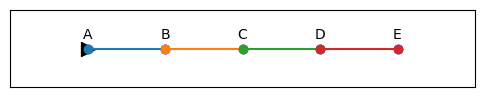

2020-12-10 00:00:00
['SN3', 'SN7']


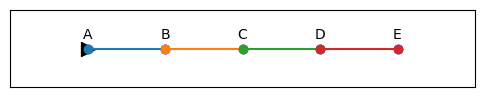

2020-12-11 00:00:00
['SN3', 'SN7']


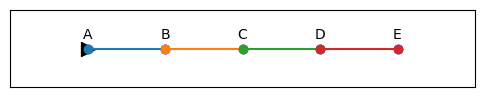

2020-12-12 00:00:00
['SN3', 'SN7']


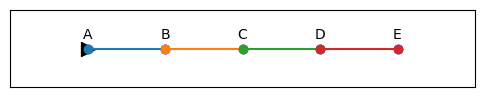

2020-12-13 00:00:00
['SN3', 'SN7']


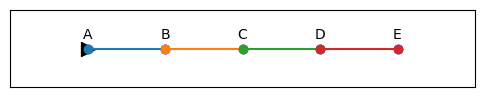

2020-12-14 00:00:00
['SN3', 'SN7']


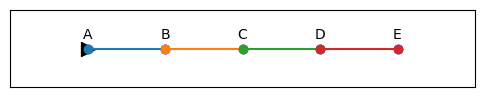

2020-12-15 00:00:00
['SN3', 'SN7']


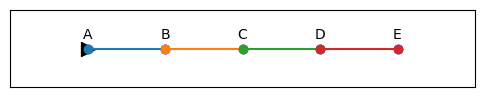

2020-12-16 00:00:00
['SN3', 'SN7']


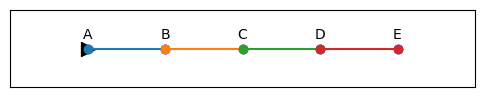

2020-12-17 00:00:00
['SN3', 'SN7']


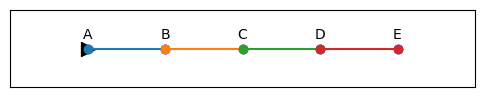

2020-12-18 00:00:00
['SN3', 'SN7']


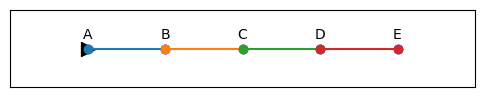

2020-12-19 00:00:00
['SN3', 'SN7']


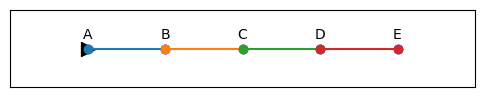

2020-12-20 00:00:00
['SN3', 'SN7']


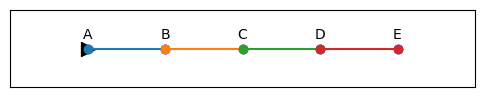

2020-12-21 00:00:00
['SN3', 'SN7']


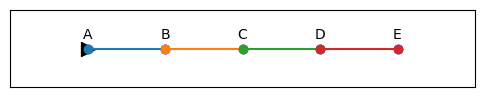

2020-12-22 00:00:00
['SN3', 'SN7']


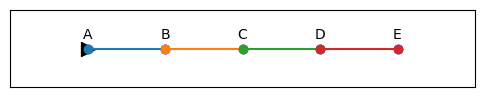

2020-12-23 00:00:00
['SN3', 'SN7']


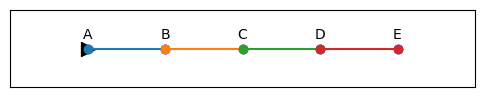

2020-12-24 00:00:00
['SN3', 'SN7']


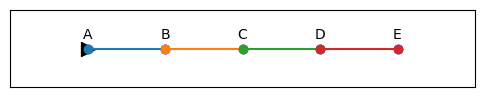

2020-12-25 00:00:00
['SN3', 'SN7']


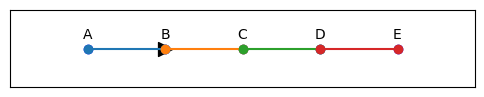

2020-12-26 00:00:00
['SN3', 'SN7']


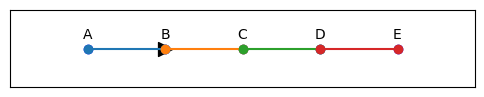

2020-12-27 00:00:00
['SN3', 'SN7']


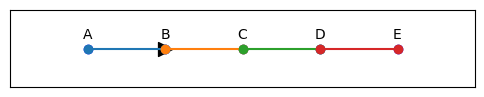

2020-12-28 00:00:00
['SN3', 'SN7']


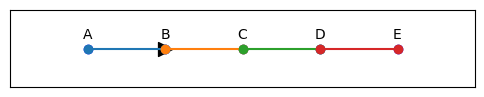

2020-12-29 00:00:00
['SN3', 'SN7']


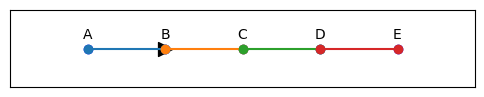

2020-12-30 00:00:00
['SN3', 'SN7']


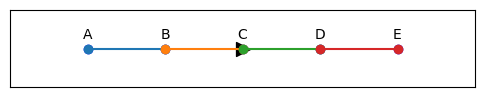

2020-12-31 00:00:00
['SN3', 'SN7']


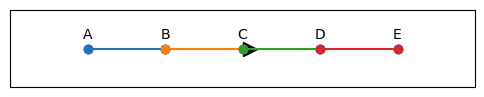

2021-01-01 00:00:00
['SN3', 'SN7']


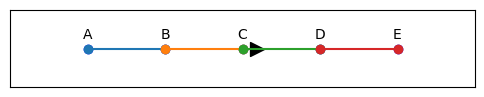

2021-01-02 00:00:00
['SN3', 'SN7']


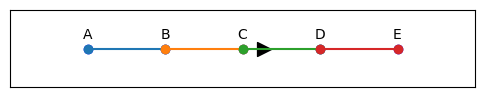

2021-01-03 00:00:00
['SN3', 'SN7']


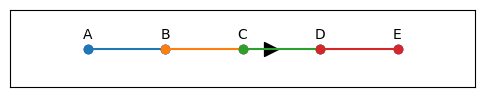

2021-01-04 00:00:00
['SN3', 'SN7']


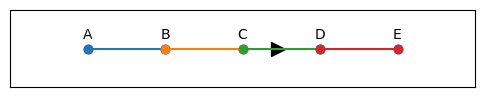

2021-01-05 00:00:00
['SN3', 'SN7']


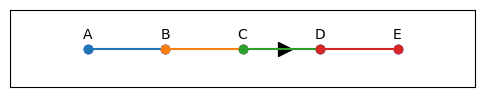

2021-01-06 00:00:00
['SN3', 'SN7']


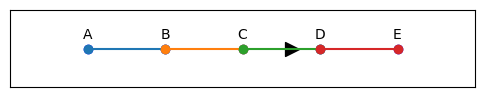

2021-01-07 00:00:00
['SN3', 'SN7']


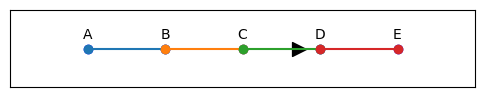

2021-01-08 00:00:00
['SN3', 'SN7']


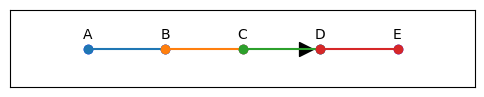

2021-01-09 00:00:00
['SN3', 'SN7']


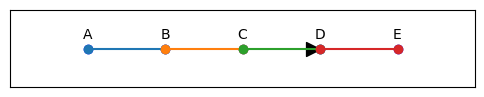

2021-01-10 00:00:00
['SN3', 'SN7']


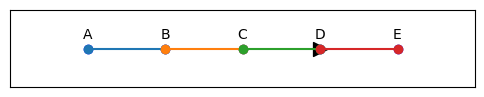

2021-01-11 00:00:00
['SN3', 'SN7']


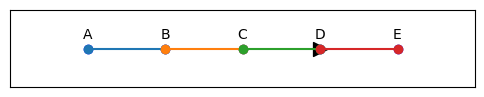

2021-01-12 00:00:00
['SN3', 'SN7']


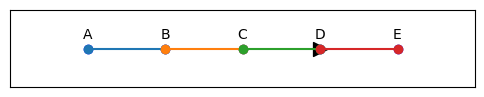

2021-01-13 00:00:00
['SN3', 'SN7']


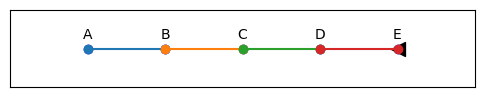

2021-01-14 00:00:00
['SN3', 'SN7']


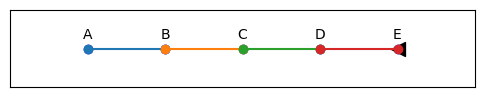

2021-01-15 00:00:00
['SN3', 'SN7']


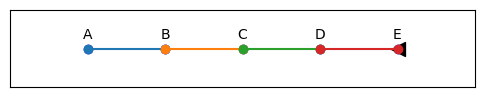

2021-01-16 00:00:00
['SN3', 'SN7']


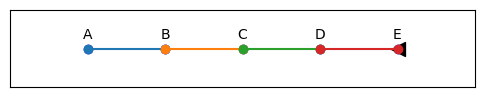

2021-01-17 00:00:00
['SN3', 'SN7']


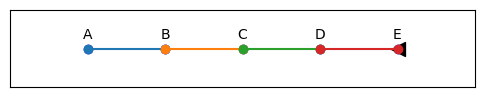

2021-01-18 00:00:00
['SN3', 'SN7']


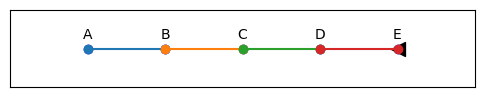

2021-01-19 00:00:00
['SN3', 'SN7']


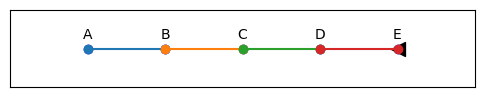

2021-01-20 00:00:00
['SN3', 'SN7']


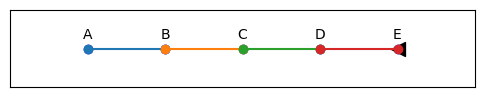

2021-01-21 00:00:00
['SN3', 'SN7']


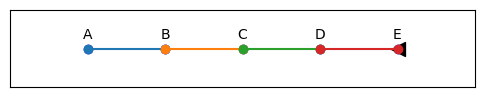

2021-01-22 00:00:00
['SN3', 'SN7']


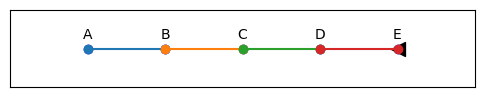

2021-01-23 00:00:00
['SN3', 'SN7']


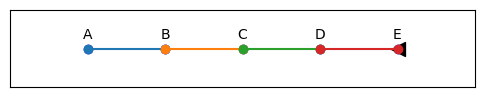

2021-01-24 00:00:00
['SN3', 'SN7']


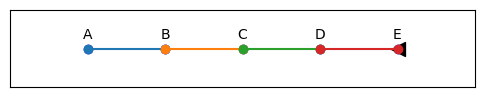

2021-01-25 00:00:00
['SN3', 'SN7']


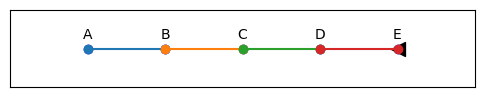

2021-01-26 00:00:00
['SN3', 'SN7']


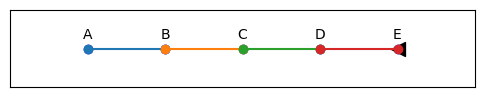

2021-01-27 00:00:00
['SN3', 'SN7']


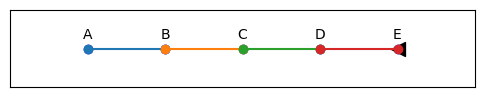

2021-01-28 00:00:00
['SN3', 'SN7']


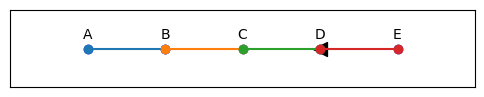

2021-01-29 00:00:00
['SN3', 'SN7']


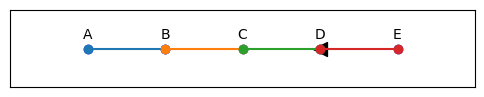

2021-01-30 00:00:00
['SN3', 'SN7']


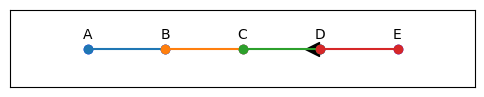

2021-01-31 00:00:00
['SN3', 'SN7']


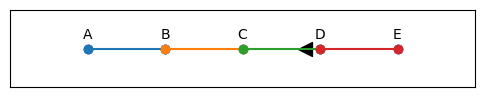

2021-02-01 00:00:00
['SN3', 'SN7']


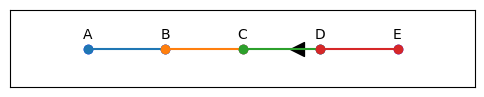

2021-02-02 00:00:00
['SN3', 'SN7']


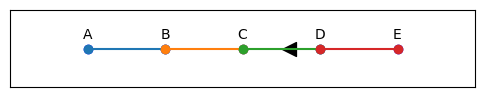

2021-02-03 00:00:00
['SN3', 'SN7']


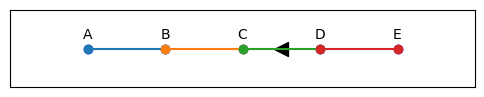

2021-02-04 00:00:00
['SN3', 'SN7']


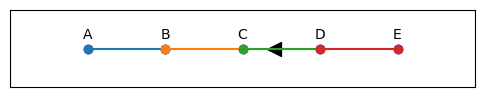

2021-02-05 00:00:00
['SN3', 'SN7']


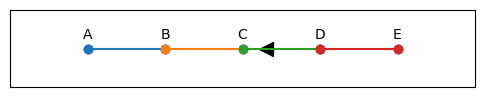

2021-02-06 00:00:00
['SN3', 'SN7']


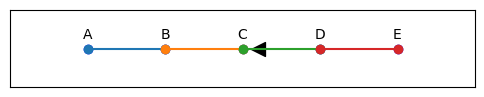

2021-02-07 00:00:00
['SN3', 'SN7']


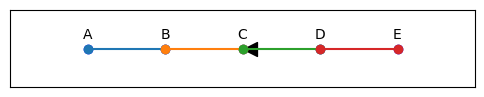

2021-02-08 00:00:00
['SN3', 'SN7']


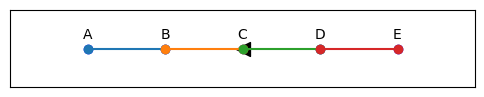

2021-02-09 00:00:00
['SN3', 'SN7']


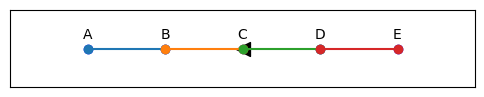

2021-02-10 00:00:00
['SN7']


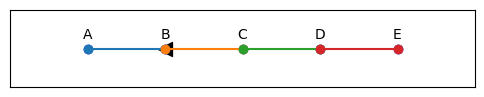

2021-02-11 00:00:00
['SN7']


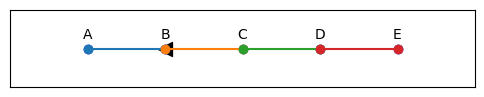

2021-02-12 00:00:00
['SN7']


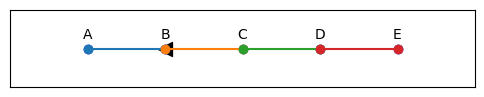

2021-02-13 00:00:00
['SN7']


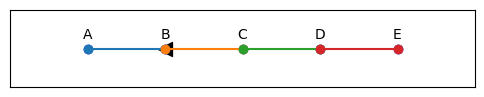

2021-02-14 00:00:00
['SN7']


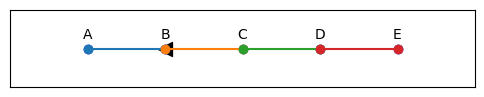

2021-02-15 00:00:00
None
2021-02-16 00:00:00
None


In [241]:
def visualize_ship(input_date):
    number_of_containers, containers,direction, zone, factor, state = fetch_infos_ship(input_date)
    print(containers)
    if state==None:
        return None
    if state=='stop':
        x_ship = ord(zone)-64
    else :
        x_ship = ord(zone)-64 +1*factor*direction
    
    # Définir les intervalles et les points de séparation
    intervals = [1, 2, 3, 4, 5]
    intervalsline = [(1, 2), (2, 3), (3, 4), (4, 5),(5,6)]
    interval_names = ['A', 'B', 'C', 'D', 'E']
    
    # Créer une figure
    plt.figure(figsize=(6, 1))
    # Tracer les points
    
    
    plt.scatter(intervals, [0]*len(intervals), marker='o', color='blue')
    
    # Ajouter les étiquettes des points
    for i, label in enumerate(interval_names):
        plt.text(intervals[i], 0.025, label, ha='center')
        
    for interval, label in zip(intervalsline, interval_names[:-1]):
        plt.plot(interval, [0, 0], marker='o')

    if direction == -1 :
        plt.scatter(x_ship, 0, marker='<', s=100, color='black')
    else : 
        plt.scatter(x_ship, 0, marker='>',s=100, color='black')
    
    # Définir les limites de l'axe x et y
    plt.xlim(0, 6)
    plt.ylim(-0.1, 0.1)
    
    
    # Masquer les graduations sur les axes
    plt.xticks([])
    plt.yticks([])
    
    # Afficher le tracé
    plt.show()

def visualize_monthly_evolution(start_date, num_days=30):
    start_date = pd.to_datetime(start_date)
    for i in range(num_days):
        current_date = start_date + pd.DateOffset(days=i)
        print(current_date)
        visualize_ship(current_date.strftime('%Y-%m-%d'))

input_date = '2020-12-09'
visualize_monthly_evolution(input_date, num_days=70)